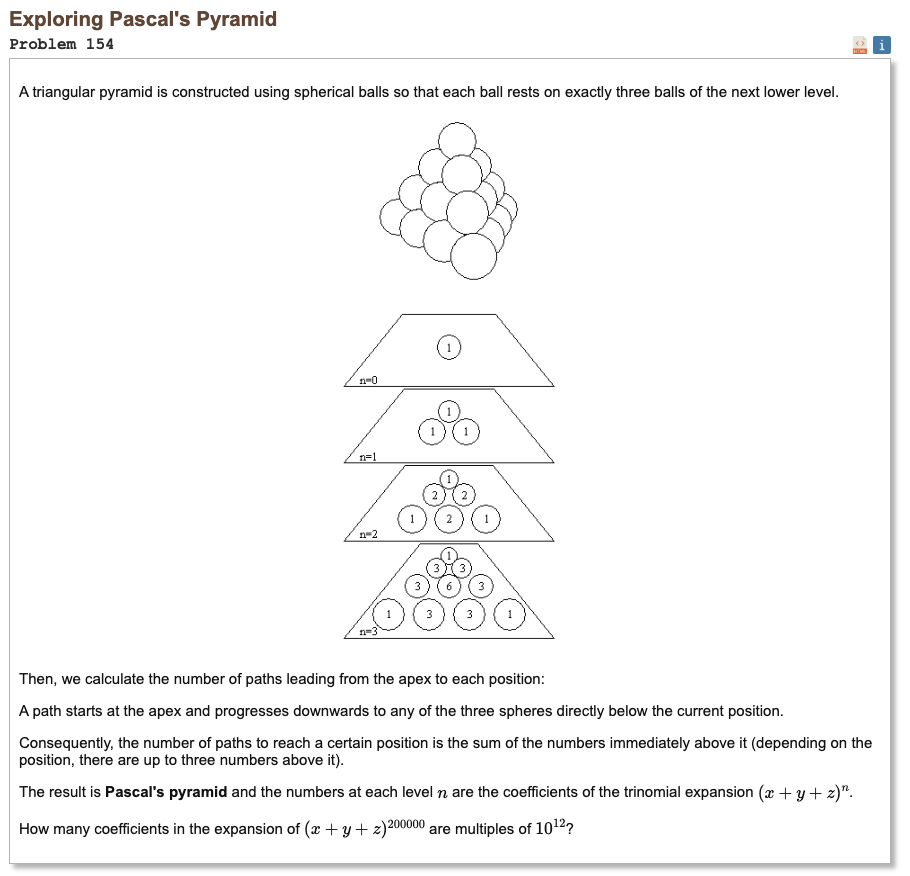

## Initial approach

* rewrite each trinomial coefficient as n!/(a! b! c!) with a+b+c=n where n=200000
* a coefficient is divisible by 10^12 iff its 2-adic value ≥12 and 5-adic value ≥12
* use v_p(k!) via legendre’s formula in prefix form so v_p(n!/(a!b!c!)) = v_p(n!)−v_p(a!)−v_p(b!)−v_p(c!)
* for fixed a set m=n−a and define g_p(b)=v_p(b!)+v_p((m−b)!)
* for each prime p in {2,5} the function g_p(b) is convex in b
* so the set {b | g_p(b) ≤ T_p} is a single interval
* for every a compute thresholds T_p=v_p(n!)−v_p(a!)−12 and find the b-intervals by binary search
* intersect the 2 and 5 intervals
* sum interval lengths over all a to count all ordered triples (a,b,c) which match
* only math and bisect from stdlib are used

In [1]:
from math import log2

def vp_factorials(n, p):
    vp = [0]*(n+1)
    for k in range(1, n+1):
        x = k
        cnt = 0
        while x % p == 0:
            x //= p
            cnt += 1
        vp[k] = vp[k-1] + cnt
    return vp

def solve(n=200000):
    vp2 = vp_factorials(n, 2)
    vp5 = vp_factorials(n, 5)
    V2n = vp2[n]
    V5n = vp5[n]
    def interval_for_p(m, T, vp):
        if T < 0:
            return None
        def g(b):
            return vp[b] + vp[m-b]
        lo, hi = 0, m
        L = None
        while lo <= hi:
            mid = (lo + hi) // 2
            if g(mid) <= T:
                L = mid
                hi = mid - 1
            else:
                lo = mid + 1
        if L is None:
            return None
        lo, hi = L, m
        R = L
        while lo <= hi:
            mid = (lo + hi) // 2
            if g(mid) <= T:
                R = mid
                lo = mid + 1
            else:
                hi = mid - 1
        return (L, R)
    total = 0
    for a in range(n+1):
        m = n - a
        T2 = V2n - vp2[a] - 12
        T5 = V5n - vp5[a] - 12
        I2 = interval_for_p(m, T2, vp2)
        if I2 is None:
            continue
        I5 = interval_for_p(m, T5, vp5)
        if I5 is None:
            continue
        L = max(I2[0], I5[0])
        R = min(I2[1], I5[1])
        if L <= R:
            total += (R - L + 1)
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 64732172
CPU times: user 1.18 s, sys: 7.84 ms, total: 1.19 s
Wall time: 1.19 s
